# Clustering Via 6 Different Clustering Algorithms
`Cluster analysis` or `clustering` is the task of grouping a set of objects in such a way that objects in the same group are more similar to each other than to those in other groups.

There are a large variety of different clustering algorithms. Each has its own set of use cases where it is more or less optimal for the problem at hand. 
<br>In this notebook I will walk through 6 different clustering algorithms in order to better understand how these algorithms cluster data and how each might be better suited for different situations. 

I will be using a simple synthetic dataset which you can find on my GitHub [here](https://github.com/JordanVencel/Clustering_Algorithms).
## Data Preview
We begin by importing required packages, reading in our synthetic dataset from github, and visualizing the data on a scatterplot. 
### Import Packages

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt

### Read In Data

In [2]:
preprocessed_data = pd.read_csv("https://raw.githubusercontent.com/JordanVencel/Clustering_Algorithms/main/synthetic_dataset.csv", names=['x','y'])
preprocessed_data

,x,y
0,0,7
1,1,8
2,1,6
3,1,1
4,2,8
5,2,7
6,2,5
7,3,7
8,3,6
9,3,0


### Visualize Preprocessed Data

[Text(0.5, 1.0, 'Preprocessed Data')]

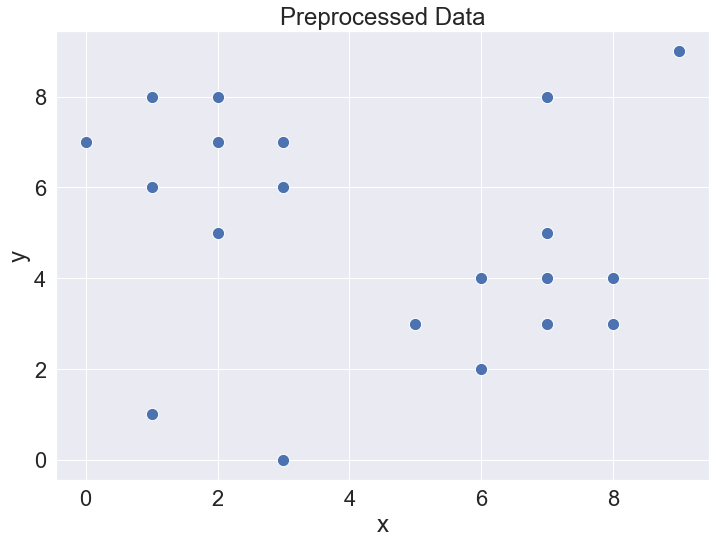

In [3]:
sb.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
sb.scatterplot(data=preprocessed_data, x='x', y='y', s=150).set(title='Preprocessed Data')

## Algorithm 1: *K*-Means 
`K-means` is an `unsupervised` learning method for clustering data points. The algorithm iteratively divides `n` data points into `K` clusters by minimizing the variance in each cluster.
### Inertia
`Inertia` measures how well a dataset was clustered by K-Means. 
<br>It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
<br> We can graph how the inertia of our data changes over the number of `k` clusters to find the optimal number of clusters to use. 
<br> As you can see by the graph below, the optimal number of `k` clusters for our data is most likely 4. 

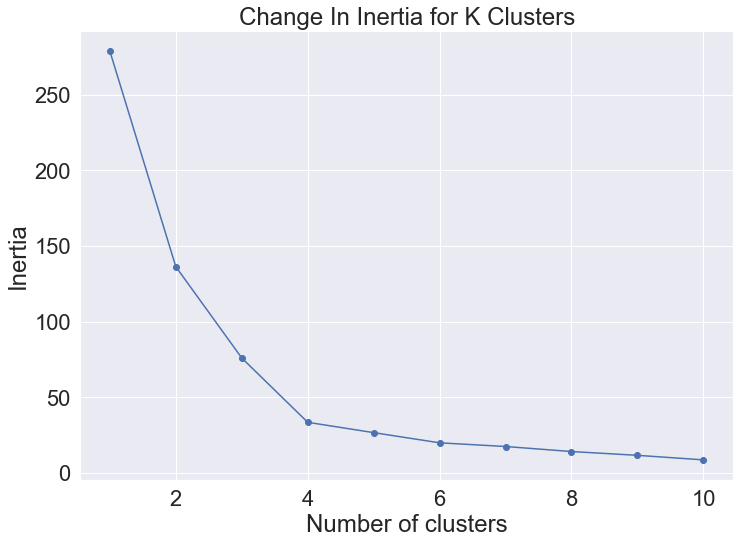

In [4]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(preprocessed_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Change In Inertia for K Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### *K*-Means Clusters Visualized

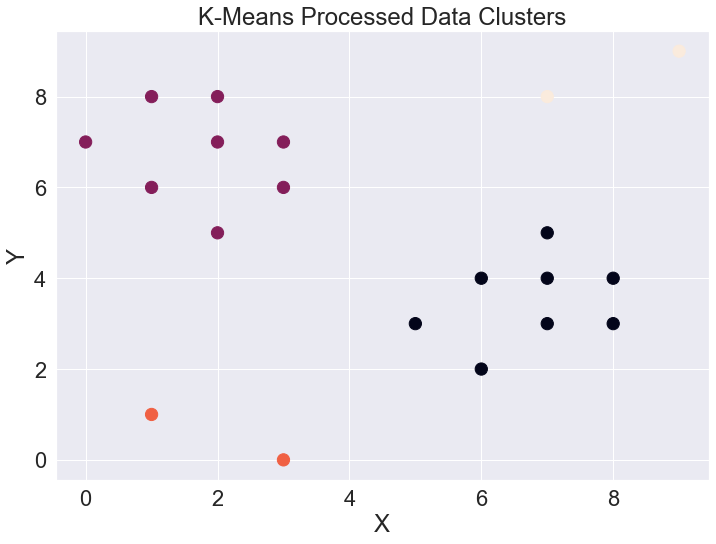

In [5]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(preprocessed_data)

plt.title("K-Means Processed Data Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(preprocessed_data['x'], preprocessed_data['y'], c=kmeans.labels_, s=150)
plt.show()

## Algorithm 2: *K*-Medoid
*K*-medoids minimizes the `sum of dissimilarities` between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the *k*-means algorithm, *k*-medoids chooses `datapoints as centers`.

### Inertia
`Inertia` measures how well a dataset was clustered by K-Means. 
<br> We can graph how the inertia of our data changes over the number of `k` clusters to find the optimal number of clusters to use. 
<br> The inertia graph follows a unique path, as the inertia reaches its minimal point at 7 clusters, then rises again afterward.

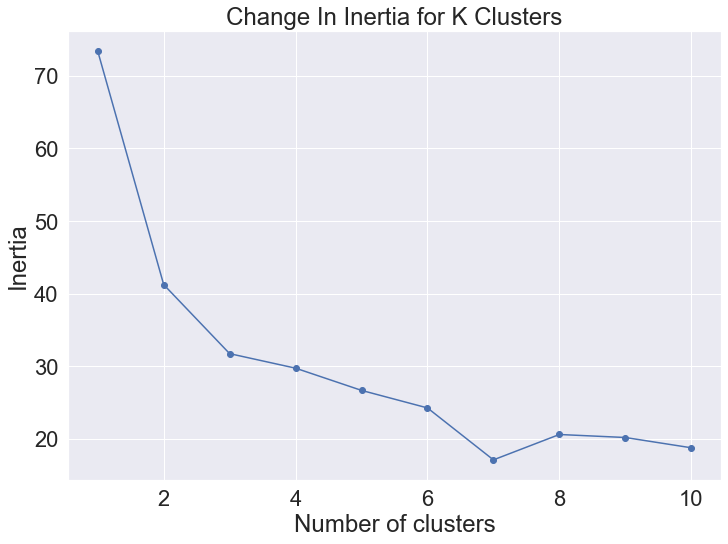

In [6]:
from sklearn_extra.cluster import KMedoids

inertias = []

for i in range(1,11):
    kmedoid = KMedoids(n_clusters=i)
    kmedoid.fit(preprocessed_data)
    inertias.append(kmedoid.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Change In Inertia for K Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### *K*-Medoid Clusters Visualized

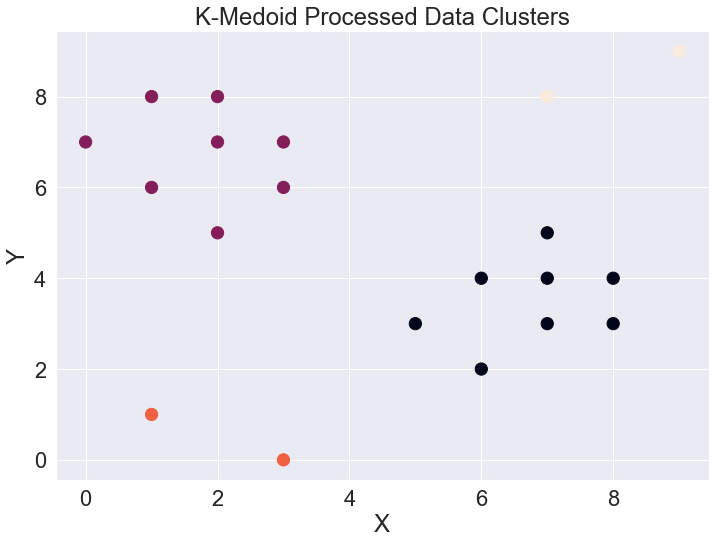

In [7]:
kmedoid = KMedoids(n_clusters=4)
kmedoid.fit(preprocessed_data)

plt.title("K-Medoid Processed Data Clusters")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(preprocessed_data['x'], preprocessed_data['y'], c=kmeans.labels_, s=150)
plt.show()

## Algorithm 3: AGNES
`AGNES (Agglomerative Nesting)` is one of the most popular hierarchical clustering algorithms used in data mining.

<br>Hierarchical clustering in data mining is a cluster formation and analysis technique that builds groups of similar objects by forming a hierarchy of clusters. That hierarchy forms a tree-like structure which is known as a dendrogram.

<br>AGNES algorithm uses a “bottom-up” approach for hierarchical clustering. The algorithm forms singleton clusters of each of the data points. It then groups them from bottom to top in the dendrogram until all the similar points form a single cluster (depicted by the root of the dendrogram).

<br> First we must process our data in such a way that it can be easily worked with. 
### Data Processing

In [8]:
data_points = []
for i in preprocessed_data.iterrows():
    data_points.append(i[1][0])
    data_points.append(i[1][1])
    
dataset = [(float(data_points[i]), float(data_points[i+1])) for i in range(0, len(data_points)-1, 2)]
dataset

[(0.0, 7.0),
 (1.0, 8.0),
 (1.0, 6.0),
 (1.0, 1.0),
 (2.0, 8.0),
 (2.0, 7.0),
 (2.0, 5.0),
 (3.0, 7.0),
 (3.0, 6.0),
 (3.0, 0.0),
 (5.0, 3.0),
 (6.0, 4.0),
 (6.0, 2.0),
 (7.0, 8.0),
 (7.0, 5.0),
 (7.0, 4.0),
 (7.0, 3.0),
 (8.0, 4.0),
 (8.0, 3.0),
 (9.0, 9.0)]

### Define AGNES Functions

In [9]:
import math
import pylab as pl 

def distance(x, y):
     return math.sqrt(math.pow(x[0] - y[0], 2) + math.pow(x[1] - y[1], 2)) 

def min_distance(Ci, Cj):
    return min(distance(i, j) for i in Ci for j in Cj) 

def max_distance(Ci, Cj):
    return max(distance(i, j) for i in Ci for j in Cj) 

def avg_distance(Ci, Cj):
    return sum(distance(i, j) for i in Ci for j in Cj) / (len(Ci) * len(Cj))

def minimum(A):
    minThresh = 1000
    a = 0; b = 0 
    for x in range(len(A)):
        for y in range(len(A[x])):
            if x != y and A[x][y] < minThresh:
                minVal = A[x][y]
                a = x 
                b = y
    return (a, b, minVal) 

def AGNES(dataset, distance, k):
    C = []
    M = []
    for point in dataset:
        Ci = []
        Ci.append(point)
        C.append(Ci)

    for i in C:
        Mi = []
        for j in C:
            Mi.append(distance(i , j))
        M.append(Mi)

        q = len(dataset)

        while q > k:
            x, y, minimumVal = minimum(M)
            C[x].extend(C[y])
            C.remove(C[y])

            M = []
            for i in C:
                Mi = []
                for j in C:
                    Mi.append(distance(i , j))
                M.append(Mi)
            q -= 1

    return C

def plot(C):
    colors = ['r','y','g','b','c','k','m']
    for i in range(len(C)):
        coor_x = []
        coor_y = []
        for j in range(len(C[i])):
            coor_x.append(C[i][j][0])
            coor_y.append(C[i][j][1])
        pl.title("AGNES Processed Data Clustering")
        pl.xlabel("x")
        pl.ylabel("y")
        pl.scatter(coor_x, coor_y, marker='x', color=colors[i % len(colors)], label=i)
        pl.show()

### Visualize AGNES Clustering

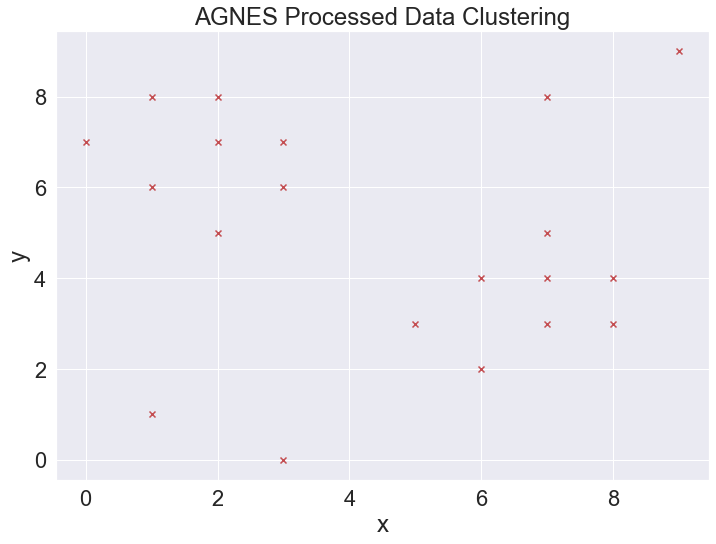

In [10]:
C = AGNES(dataset, max_distance, 1)
plot(C)

## Algorithm 4: DBSCAN
`Density-Based Spatial Clustering of Applications with Noise` (DBSCAN) is a base algorithm for density-based clustering. It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers.

<br>The DBSCAN algorithm uses two parameters:

    -minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.
    -eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.
These parameters can be understood if we explore two concepts called `Density Reachability` and `Density Connectivity`.

`Reachability` in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

`Connectivity` involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.

### Process Data

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, labels_true = make_blobs(n_samples=20, centers=preprocessed_data, cluster_std=0.4, random_state=0)

db = DBSCAN(eps=2.3, min_samples=2).fit(preprocessed_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

### Visualize Processed DBSCAN Algorithm Data

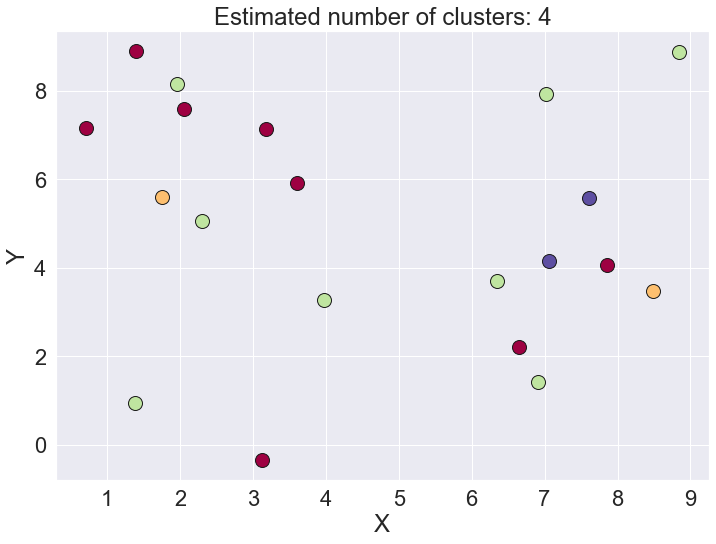

In [12]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Algorithm 5: OPTIC
`OPTICS` clustering stands for `Ordering Points To Identify Cluster Structure`. It draws inspiration from the `DBSCAN` clustering algorithm. It adds two more terms to the concepts of DBSCAN clustering:

1. `Core Distance`: Core Distance the minimum value of radius required to classify a given point as a core point. If the given point is not a Core point, then it’s Core Distance is undefined.
2. `Reachability Distance`: Reachability Distance is defined with respect to another data point q(Let). The Reachability distance between a point p and q is the maximum of the Core Distance of p and the Euclidean Distance(or some other distance metric) between p and q. Note that The Reachability Distance is not defined if q is not a Core point.

`OPTICS` finds core samples of high density and expands clusters from them. Unlike `DBSCAN`, OPTICS keeps cluster hierarchy for a variable neighborhood radius. This algorithm is better suited for usage on large datasets.

### Process Data


In [13]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

X = np.vstack((dataset))
clust = OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.05)

clust.fit(X)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,core_distances=clust.core_distances_,ordering=clust.ordering_,eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,core_distances=clust.core_distances_,ordering=clust.ordering_,eps=2)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

### Visualize OPTIC Processed Data 

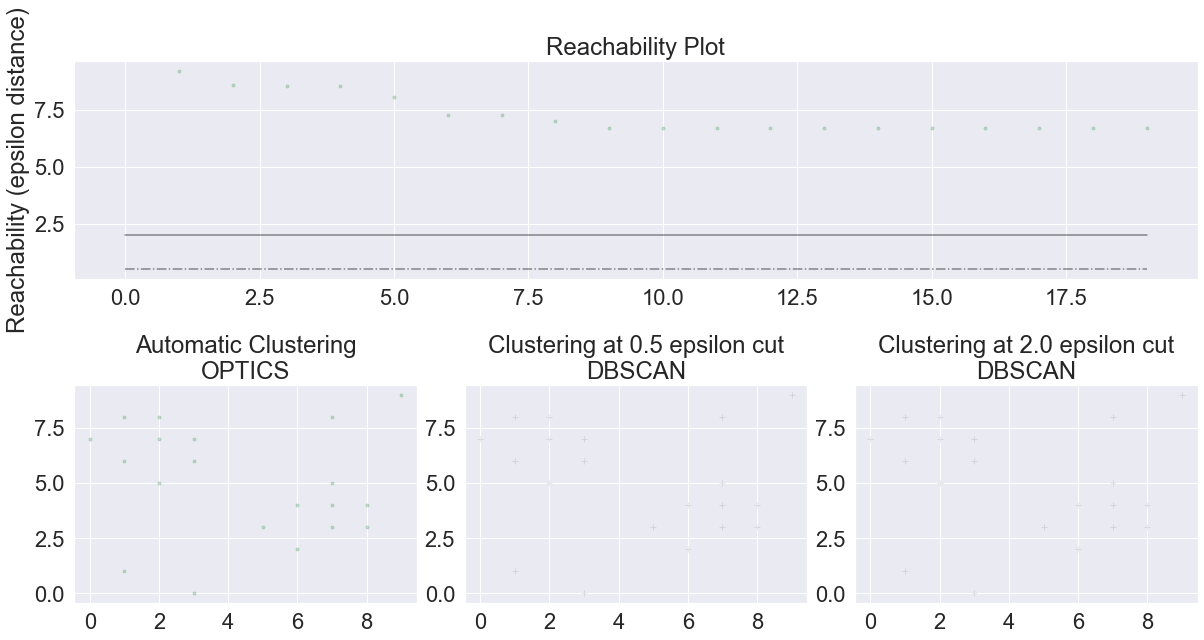

In [14]:
plt.figure(figsize=(17, 9))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g", "greenyellow", "olive", "r", "b", "c"]
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker=".")
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

## Algorithm 6: Spectral Clustering
`Spectral clustering` techniques make use of the spectrum (`eigenvalues`) of the `similarity matrix` of the data to perform `dimensionality reduction` before clustering in fewer dimensions. The `similarity matrix` is provided as an input and consists of a quantitative assessment of the relative `similarity` of each pair of points in the dataset.

<br>In practice, `spectral clustering` is very useful when the structure of the individual clusters is highly `non-convex`, or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plane.

### Process Data

In [15]:
from sklearn.cluster import SpectralClustering

clust = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=0).fit(preprocessed_data)
labels = clust.labels_

### Visualize Spectrally Clustered Data

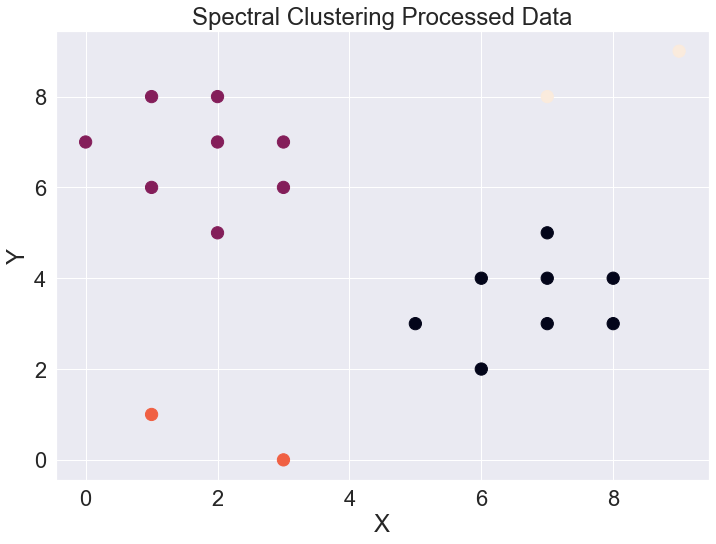

In [16]:
plt.title("Spectral Clustering Processed Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(preprocessed_data['x'], preprocessed_data['y'], c=labels, s=150)
plt.show()